U programskom jeziku Python izvrsiti hijerarhijsko sakupljajuce klasterovanje nad skupom u datoteci studenti.csv za razlicit broj klastera u intervalu od 2 do 34 i primenom
razlicitih veza za odredivanje bliskosti dva klastera. Skup u datoteci studenti.csv sadrzi
podatke o studentima koji su diplomirali. Za svakog studenta su izdvojeni sledeci podaci:
indeks, naziv smera koji je diplomirao, duzina studiranja u godinama, broj polozenih
ispita i prosecna ocena. Za svaku primenjenu vezu
• rezultat kalsterovanja prikazati pomocu graka sa silueta koecijentom i brojem
izdvojenih klastera
1
• za klasterovanje sa najvecim senka koecijentom izdvojiti deskriptivne statistike za
svaki klaster da bi se uocilo sta ga karakteris

In [5]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('studenti.csv')
df.isna().sum()

#atribut indeks izbacujemo jer je unique
features = df.columns[1:]
x_orig = df[features]

#posto se za klasterovanje koriste 3 numericka i 1 kateg moramo izvrsiti binarizaciju tog 1 u numericki
df_trans = pd.get_dummies(df[features])


#normalizacija
x = pd.DataFrame(prep.MinMaxScaler().fit_transform(df_trans), columns = df_trans.columns)

dummy_cols = [col for col in df_trans.columns if col.startswith('SMER')]

for col in dummy_cols:
    x[col].replace(1,np.sqrt(0.5), inplace = True)
    


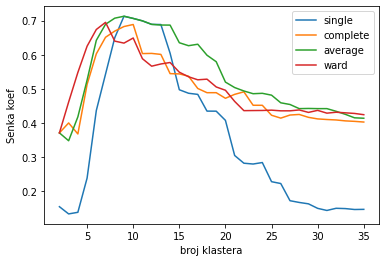

In [20]:
# 2 do 34 i primenom razlicitih veza za odredivanje bliskosti dva klastera
linkage = ['single', 'complete', 'average', 'ward']
for link in linkage:
    
    sc = {'clusters' : [], 'scores' : []}
    
    for i in range(2,36):
        est = AgglomerativeClustering(n_clusters = i, linkage = link)
        est.fit(x)
        
        sc['clusters'].append(i)
        sc['scores'].append(met.silhouette_score(x, est.labels_))
        
   
    plt.plot(sc['clusters'], sc['scores'], label = link)
    
    best_cluster = sc['clusters'][np.argmax(sc['scores'])]
                                
    est = AgglomerativeClustering(n_clusters = best_cluster, linkage = link)
    est.fit(x)
    
    df['label']=est.labels_
    
    for j in range(0, best_cluster):
        cluster = df.loc[lambda x: x['label']==j,:]
#         print("klaster %d\n"%j, cluster.describe())
    
    
plt.xlabel('broj klastera')
plt.ylabel('Senka koef')
plt.legend()

Kolone za klasterovanje ['SMER', 'DUZINA_STUDIRANJA', 'POLOZENO_ISPITA', 'PROSEK']
Kolone nakon izvrsene binarizacije  ['DUZINA_STUDIRANJA', 'POLOZENO_ISPITA', 'PROSEK', 'SMER_Astrofizika', 'SMER_Astronomija i astrofizika', 'SMER_Informatika', 'SMER_Matematika', 'SMER_Numericka matematika i optimizacija', 'SMER_Profesor matematike i racunarstva', 'SMER_Racunarstvo i informatika', 'SMER_Statistika, aktuarska i finansijska matematika', 'SMER_Teorijska matematika i primene']
***Veza complete broj klastera sa najvecim senka koeficijentom 10 ***
Klaster 0
              INDEKS         SMER  DUZINA_STUDIRANJA  POLOZENO_ISPITA  \
count   1.000000e+01           10          10.000000        10.000000   
unique           NaN            1                NaN              NaN   
top              NaN  Informatika                NaN              NaN   
freq             NaN           10                NaN              NaN   
mean    2.006220e+07          NaN           4.600000        35.600000   
std  

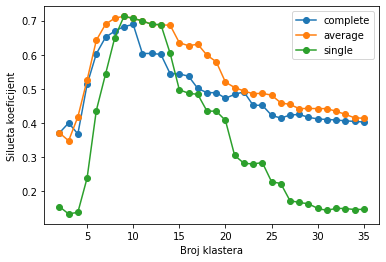

In [7]:


# primena hijerarhijskog sakupljajuceg klasterovanja za razlicite veze i broj klastera
for link in ['complete', 'average', 'single']:

    # recnik koji ce sadrzati silueta koeficijent za razlicit broj izdvojenih klastera
    silhouette_scores = {'clusters': [], 'score': []}

    for i in range(2,36):
        # primena algoritma za i klastera
        est = AgglomerativeClustering(n_clusters=i, linkage=link)
        est.fit(x)

        #cuvanje podataka o broju klastera i silueta koeficijentu za izvrseno klasterovanje
        #radi grafickog prikaza
        silhouette_scores['clusters'].append(i)
        silhouette_scores['score'].append(silhouette_score(x, est.labels_))

    # prikaz rezultata klasterovanja pomocu grafika broj klastera - senka koeficijent
    # za vezu koriscenu pri hijerarhijskom klasterovanju
    plt.plot(silhouette_scores['clusters'], silhouette_scores['score'], marker='o', label=link)

    #izdvajanje optimalnog broja klastera sa zadatim parametrima pri klasterovanju
    # na osnovu silueta koeficijenta
    best_num_clusters = silhouette_scores['clusters'][np.argmax(silhouette_scores['score'])]

    print('***Veza', link, 'broj klastera sa najvecim senka koeficijentom', best_num_clusters, '***')
    #primena klasterovanja sa optimalnim brojem klastera da bi se
    #izdvojile deskriptivne statistike za svaki klaster
    est = AgglomerativeClustering(n_clusters=i, linkage=link)
    est.fit(x)
    df['label']=est.labels_

    #racuanje i prikaz deskriptivnih statistika za svaki izdvojeni klaster
    for j in range(0, best_num_clusters):
        cluster = df.loc[lambda r: r['label'] == j, :]
        print('Klaster', j)
        print(cluster.describe(include='all'))

# postavljanje teksta za x i y osu
plt.xlabel('Broj klastera')
plt.ylabel('Silueta koeficijent')

# prikaz legende na slici
plt.legend()

#cuvanje slike
plt.savefig('klasterovanje_studenata.png')


#Na osnovu dobijene slike, vidi se da je za sve tri primenjene veze za odredjivanje
# bliskosti dva klastera pri hijerarhijskom klasterovanju, optimalan broj klastera 9 ili 10.

#Za vezbu: uraditi zadatak koriscenjem Menhetn rastojanja.
#Sta je sve potrebno promeniti?